# Dados e Aprendizagem Automática
### Part III

## **Data Exploration and Preparation**

In [62]:
import sklearn as skl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

*Load the CSV - Wine Dataset*

In [63]:
'''
Load CSV
'''
df = pd.read_csv('datasets/wine.csv')

**1. Understand the data**

* .columns
* .head()
* .tail()
* .shape
*.dtypes
* .info()
* .describe()
* .isna()

In [64]:
'''
Inspect data
'''
print(df.columns)

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline', 'Class'],
      dtype='object')


In [65]:
df.shape
df.tail()


Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     OD280/OD315 of diluted wines  Proline  Class  
173                          1.74      740  three  
174                          1.56      750  three  
175                          1.56      835  three  
176                          1.62      840  three  
177                          1.60      560  three

In [66]:
df.dtypes

Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
Class                            object
dtype: object

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  Class

In [68]:
df.isna()
#valores em falta

Alcohol  Malic acid    Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      False       False  False              False      False          False   
1      False       False  False              False      False          False   
2      False       False  False              False      False          False   
3      False       False  False              False      False          False   
4      False       False  False              False      False          False   
..       ...         ...    ...                ...        ...            ...   
173    False       False  False              False      False          False   
174    False       False  False              False      False          False   
175    False       False  False              False      False          False   
176    False       False  False              False      False          False   
177    False       False  False              False      False          False   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity  \
0         False                 False            False            False   
1         False                 False            False            False   
2         False                 False            False            False   
3         False                 False            False            False   
4         False                 False            False            False   
..          ...                   ...              ...              ...   
173       False                 False            False            False   
174       False                 False            False            False   
175       False                 False            False            False   
176       False                 False            False            False   
177       False                 False            False            False   

       Hue  OD280/OD315 of diluted wines  Proline  Class  
0    False                         False    False  False  
1    False                         False    False  False  
2    False                         False    False  False  
3    False                         False    False  False  
4    False                         False    False  False  
..     ...                           ...      ...    ...  
173  False                         False    False  False  
174  False                         False    False  False  
175  False                         False    False  False  
176  False                         False    False  False  
177  False                         False    False  False  

[178 rows x 14 columns]

In [69]:
df.describe()

Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color intensity         Hue  OD280/OD315 of diluted wines      Proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

In [70]:
df.tail()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     OD280/OD315 of diluted wines  Proline  Class  
173                          1.74      740  three  
174                          1.56      750  three  
175                          1.56      835  three  
176                          1.62      840  three  
177                          1.60      560  three

In [71]:
df['Color intensity'].describe()

count    178.000000
mean       5.058090
std        2.318286
min        1.280000
25%        3.220000
50%        4.690000
75%        6.200000
max       13.000000
Name: Color intensity, dtype: float64

In [72]:
'''
Missing data
'''
df.isna().any()

Alcohol                         False
Malic acid                      False
Ash                             False
Alcalinity of ash               False
Magnesium                       False
Total phenols                   False
Flavanoids                      False
Nonflavanoid phenols            False
Proanthocyanins                 False
Color intensity                 False
Hue                             False
OD280/OD315 of diluted wines    False
Proline                         False
Class                           False
dtype: bool

In [73]:
print(df.isna().sum())

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Class                           0
dtype: int64


**Find the goal**

*Goal:* identify the type of wine by its properties - the target is a numeric categorical variable that covers the values of 0, 1 and 2

*Modeling:* use the characteristics of the wine to predict its type

**2. Data preparation and transformation**

- drop useless columns
- rename columns 
- handle missing values
- handle duplication
- create new features

As all the variables appear to be physicochemical measures, they could all be useful and help to define the segmentation of the wine type. There is no reason to remove columns.

In [74]:
'''
Drop Duplicates
'''
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  Cla

In [75]:
'''
Rename complicated columns' names
'''  
df.rename(columns={'OD280/OD315 of diluted wines' : 'Protein Concentration'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Alcohol                178 non-null    float64
 1   Malic acid             178 non-null    float64
 2   Ash                    178 non-null    float64
 3   Alcalinity of ash      178 non-null    float64
 4   Magnesium              178 non-null    int64  
 5   Total phenols          178 non-null    float64
 6   Flavanoids             178 non-null    float64
 7   Nonflavanoid phenols   178 non-null    float64
 8   Proanthocyanins        178 non-null    float64
 9   Color intensity        178 non-null    float64
 10  Hue                    178 non-null    float64
 11  Protein Concentration  178 non-null    float64
 12  Proline                178 non-null    int64  
 13  Class                  178 non-null    object 
dtypes: float64(11), int64(2), object(1)
memory usage: 19.6+ KB

In [76]:
'''
Remove values (Ash smaller than 2, Alcalinity bigger than 15)
'''
df_clean = df.drop(df.loc[(df['Ash']<2) & (df['Alcalinity of ash']>15)].index)
print(df_clean)



     Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyan

**2. Univariate analysis**

Get basic information by iterating through each relevant variable using:

- .hist()
- .value_counts()
- .skew()
- .kurt()

In [77]:
'''
Categorical variables
'''
df['Alcohol'].value_counts()


Alcohol
13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: count, Length: 126, dtype: int64

In [78]:
df['Class'].value_counts(normalize=True)

Class
two      0.398876
one      0.331461
three    0.269663
Name: proportion, dtype: float64

In [79]:
'''
Numeric variables
'''
df['Magnesium'].describe()

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: Magnesium, dtype: float64

Histogram: Axes(0.125,0.11;0.775x0.77)


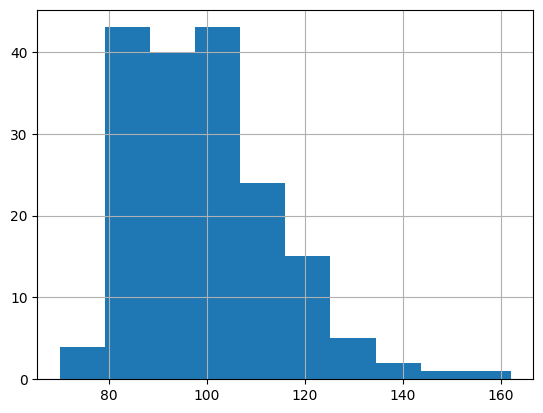

In [80]:
print(f"Histogram: {df['Magnesium'].hist()}")

Does not follow a normal curve and has spikes.

In [81]:
print(f"Skewness: {df['Magnesium'].skew()}")

Skewness: 1.098191054755161


In [82]:
print(f"Kurtosis: {df['Magnesium'].kurt()}")

Kurtosis: 2.1049913235905557


Kurtosis and asymmetry values are greater than 1.

*Summarize the dataset*

- Variable: the name of the variable
- Type: the type or format of the variable. This can be categorical, numeric, Boolean, etc.
- Context: useful information to understand the semantic space of the variable. In the case of our dataset, the context is always the physicochemical one
- Expectation: how relevant is this variable for our task? We can use a scale “High, Medium, Low”
- Comments: if we have any comments to make about the variable

**3. Multivariate analysis**

- grouping
- bins
- statistical dispersion: histogram, box plots, scatter plots, pair plots, correlation matrixes

> scatterplots: plot 2 variables against each other and understand how they move together

> pairplots: plot all variables against each other and understand how they move together

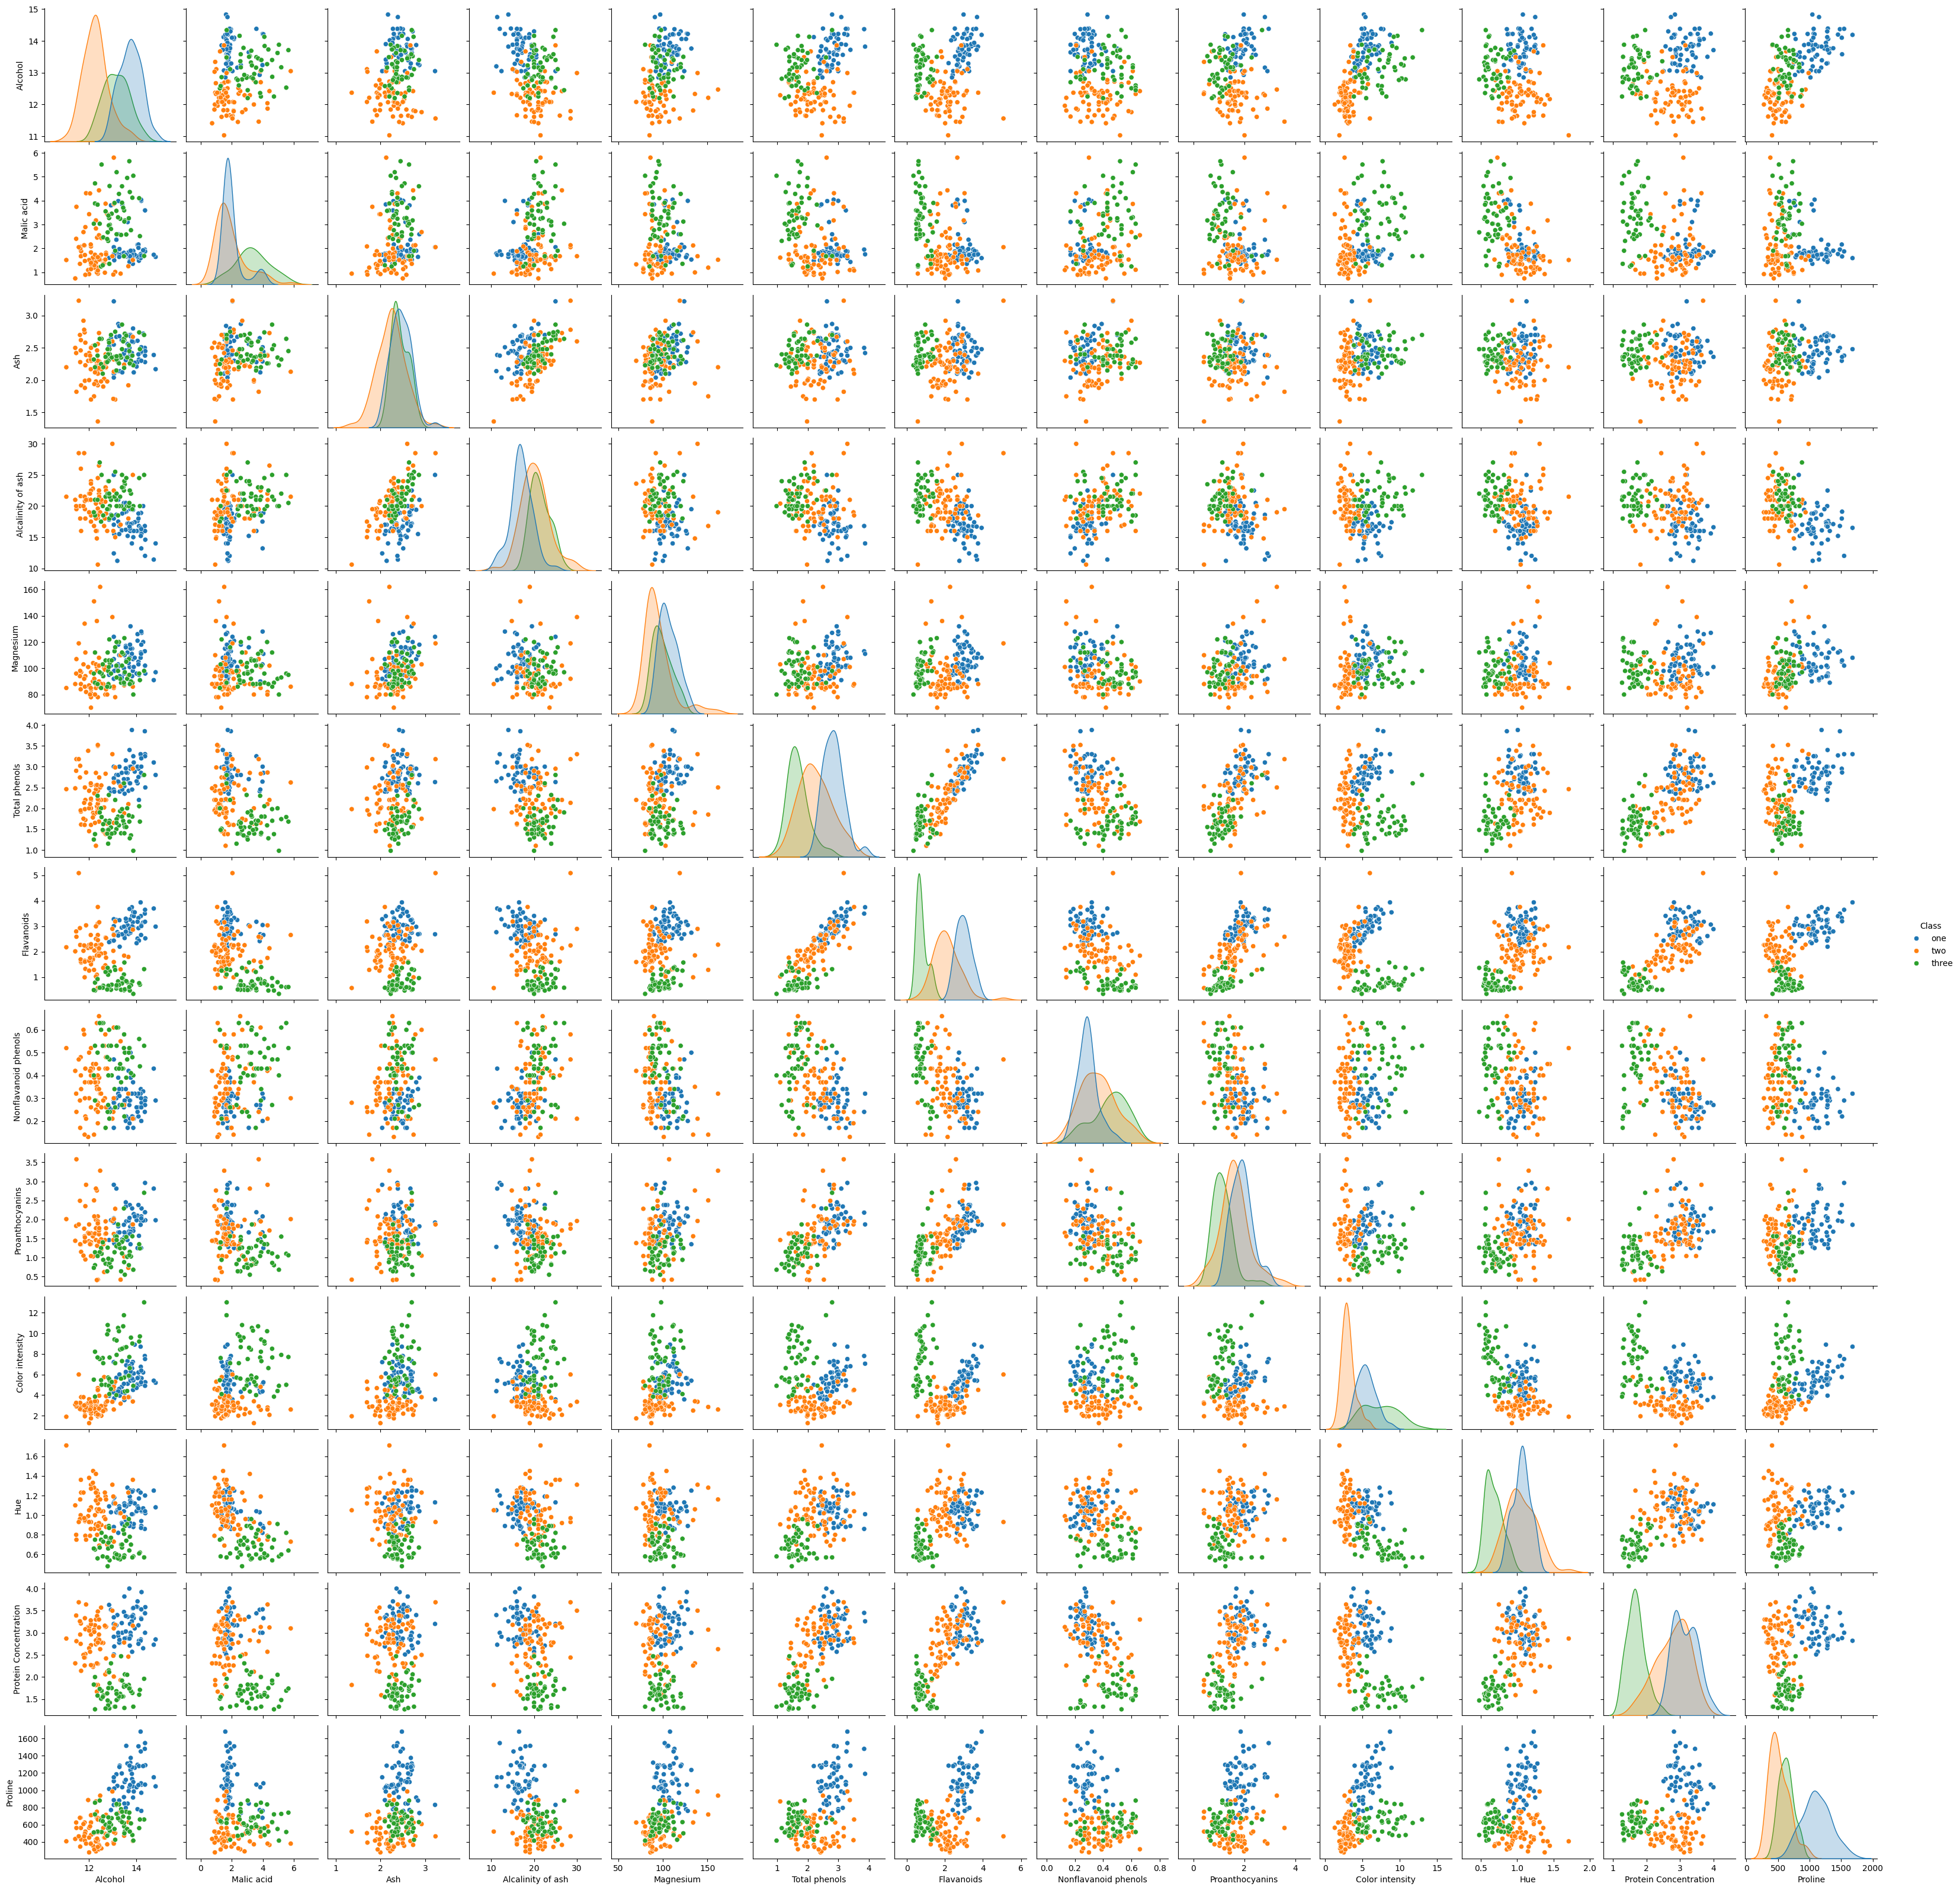

In [83]:
'''
All variables
'''
sns.pairplot(df, hue="Class")

In [84]:
'''
Grouping
'''
df.groupby(by=['Class']).mean(numeric_only=True)

Alcohol  Malic acid       Ash  Alcalinity of ash   Magnesium  \
Class                                                                   
one    13.744746    2.010678  2.455593          17.037288  106.338983   
three  13.153750    3.333750  2.437083          21.416667   99.312500   
two    12.278732    1.932676  2.244789          20.238028   94.549296   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
Class                                                                     
one         2.840169    2.982373              0.290000         1.899322   
three       1.678750    0.781458              0.447500         1.153542   
two         2.258873    2.080845              0.363662         1.630282   

       Color intensity       Hue  Protein Concentration      Proline  
Class                                                                 
one           5.528305  1.062034               3.157797  1115.711864  
three         7.396250  0.682708               1.683542   629.895833  
two           3.086620  1.056282               2.785352   519.507042

In [85]:
df.groupby(by=['Class', 'Proline']).mean(numeric_only=True)

Alcohol  Malic acid    Ash  Alcalinity of ash  Magnesium  \
Class Proline                                                             
one   680       13.240       3.980  2.290               17.5      103.0   
      735       13.240       2.590  2.870               21.0      118.0   
      760       14.220       3.990  2.510               13.2      128.0   
      770       12.930       3.800  2.650               18.6      102.0   
      780       14.060       1.630  2.280               16.0      126.0   
...                ...         ...    ...                ...        ...   
two   750       12.835       0.965  2.155               15.9      123.0   
      870       12.290       1.610  2.210               20.4      103.0   
      886       11.960       1.090  2.300               21.0      101.0   
      937       12.470       1.520  2.200               19.0      162.0   
      985       12.990       1.670  2.600               30.0      139.0   

               Total phenols  Flavanoids  Nonflavanoid phenols  \
Class Proline                                                    
one   680              2.640       2.630                  0.32   
      735              2.800       2.690                  0.39   
      760              3.000       3.040                  0.20   
      770              2.410       2.410                  0.25   
      780              3.000       3.170                  0.24   
...                      ...         ...                   ...   
two   750              2.215       1.575                  0.45   
      870              1.100       1.020                  0.37   
      886              3.380       2.140                  0.13   
      937              2.500       2.270                  0.32   
      985              3.300       2.890                  0.21   

               Proanthocyanins  Color intensity    Hue  Protein Concentration  
Class Proline                                                                  
one   680                 1.66            4.360  0.820                   3.00  
      735                 1.82            4.320  1.040                   2.93  
      760                 2.08            5.100  0.890                   3.53  
      770                 1.98            4.500  1.030                   3.52  
      780                 2.10            5.650  1.090                   3.71  
...                        ...              ...    ...                    ...  
two   750                 1.59            3.285  1.040                   2.12  
      870                 1.46            3.050  0.906                   1.82  
      886                 1.65            3.210  0.990                   3.13  
      937                 3.28            2.600  1.160                   2.63  
      985                 1.96            3.350  1.310                   3.50  

[138 rows x 12 columns]

In [86]:
print(df.groupby(by=['Alcohol']).agg([pd.Series.mode]))

           Malic acid           Ash Alcalinity of ash Magnesium Total phenols  \
                 mode          mode              mode      mode          mode   
Alcohol                                                                         
11.03            1.51           2.2              21.5        85          2.46   
11.41            0.74           2.5              21.0        88          2.48   
11.45             2.4          2.42              20.0        96           2.9   
11.46            3.74          1.82              19.5       107          3.18   
11.56            2.05          3.23              28.5       119          3.18   
...               ...           ...               ...       ...           ...   
14.37            1.95           2.5              16.8       113          3.85   
14.38    [1.87, 3.59]  [2.28, 2.38]      [12.0, 16.0]       102   [3.25, 3.3]   
14.39            1.87          2.45              14.6        96           2.5   
14.75            1.73       

In [87]:
print(df.groupby(by=['Alcohol', 'Flavanoids']).mean(numeric_only=True))

                    Malic acid   Ash  Alcalinity of ash  Magnesium  \
Alcohol Flavanoids                                                   
11.03   2.17              1.51  2.20               21.5       85.0   
11.41   2.01              0.74  2.50               21.0       88.0   
11.45   2.79              2.40  2.42               20.0       96.0   
11.46   2.58              3.74  1.82               19.5      107.0   
11.56   5.08              2.05  3.23               28.5      119.0   
...                        ...   ...                ...        ...   
14.38   3.17              3.59  2.28               16.0      102.0   
        3.64              1.87  2.38               12.0      102.0   
14.39   2.52              1.87  2.45               14.6       96.0   
14.75   3.69              1.73  2.39               11.4       91.0   
14.83   2.98              1.64  2.17               14.0       97.0   

                    Total phenols  Nonflavanoid phenols  Proanthocyanins  \
Alcohol Flava

In [88]:
'''
Bins
'''
#info: https://scikit-learn.org/stable/modules/preprocessing.html#discretization
estimator = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df['alcohol_binned'] = estimator.fit_transform(df[['Alcohol']])

print('Bin Edges')
print(estimator.bin_edges_[0])
print('Alcohol Groups')
print(df.groupby(by=['alcohol_binned']).count())

Bin Edges
[11.03 12.52 13.48 14.83]
Alcohol Groups
                Alcohol  Malic acid  Ash  Alcalinity of ash  Magnesium  \
alcohol_binned                                                           
0.0                  59          59   59                 59         59   
1.0                  58          58   58                 58         58   
2.0                  61          61   61                 61         61   

                Total phenols  Flavanoids  Nonflavanoid phenols  \
alcohol_binned                                                    
0.0                        59          59                    59   
1.0                        58          58                    58   
2.0                        61          61                    61   

                Proanthocyanins  Color intensity  Hue  Protein Concentration  \
alcohol_binned                                                                 
0.0                          59               59   59                     59   
1.

<Axes: xlabel='Proline', ylabel='Count'>

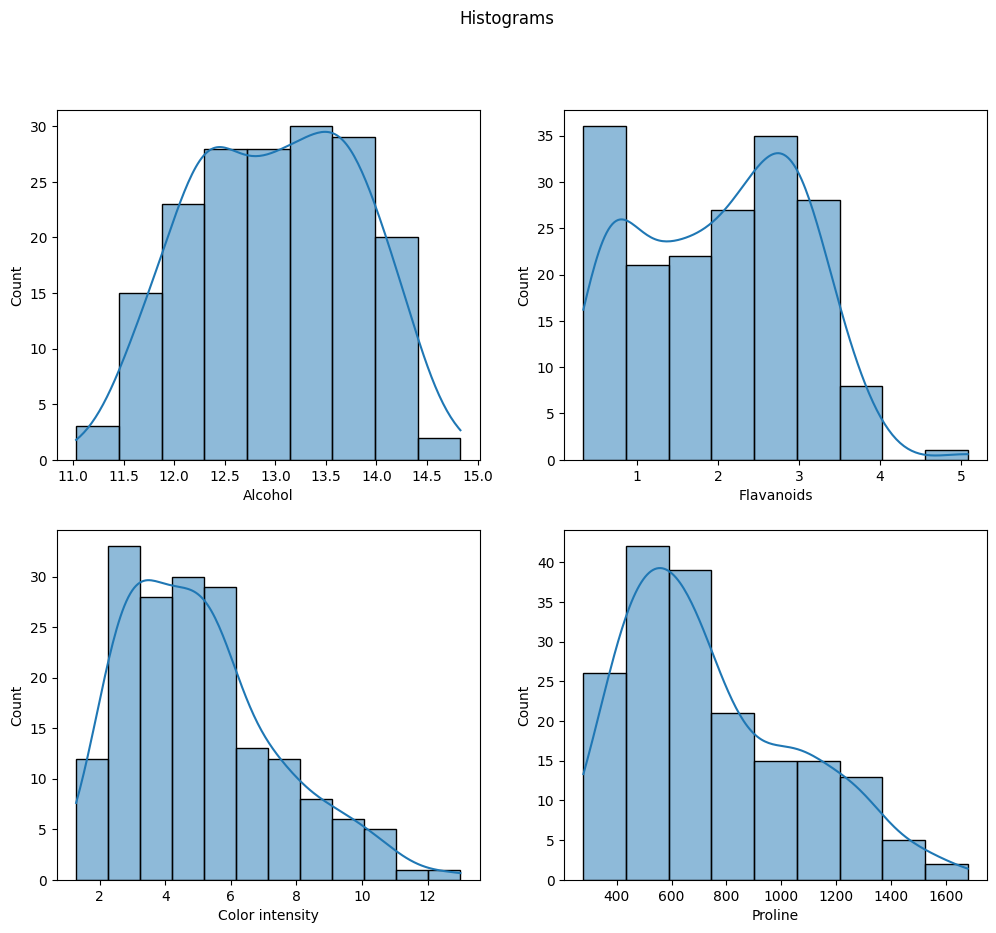

In [89]:
'''
Statistical Dispersion
'''
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Histograms')

sns.histplot(df['Alcohol'], ax=axs[0, 0], kde=True)
sns.histplot(df['Flavanoids'], ax=axs[0, 1], kde=True)
sns.histplot(df['Color intensity'], ax=axs[1, 0], kde=True)
sns.histplot(df['Proline'], ax=axs[1, 1], kde=True)

The best way to understand the relationship between a numeric variable and a categorical variable is through a boxplot.

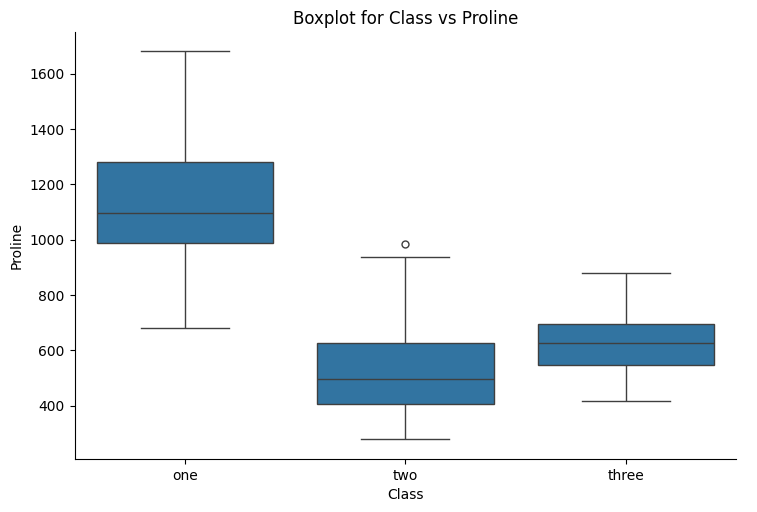

In [90]:
'''
Box plots (Outliers)
'''
sns.catplot(x='Class', y='Proline', data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Class vs Proline")
plt.show()

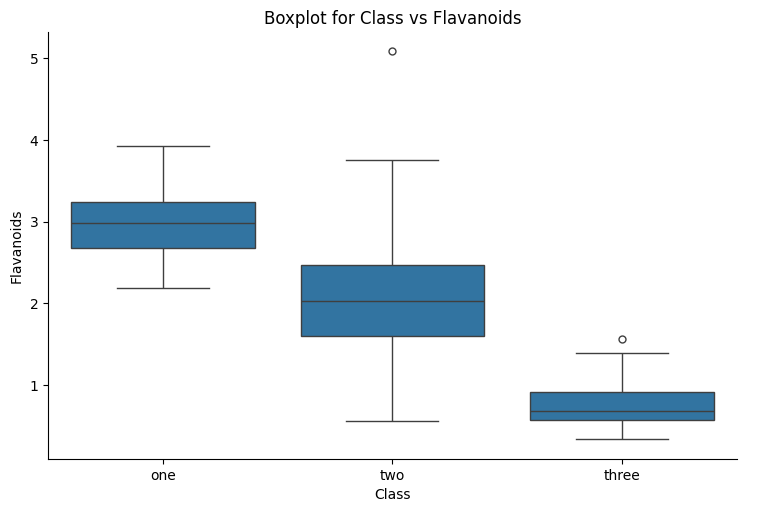

In [91]:
sns.catplot(x='Class', y='Flavanoids', data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Class vs Flavanoids")
plt.show()

<Axes: xlabel='Flavanoids', ylabel='Proline'>

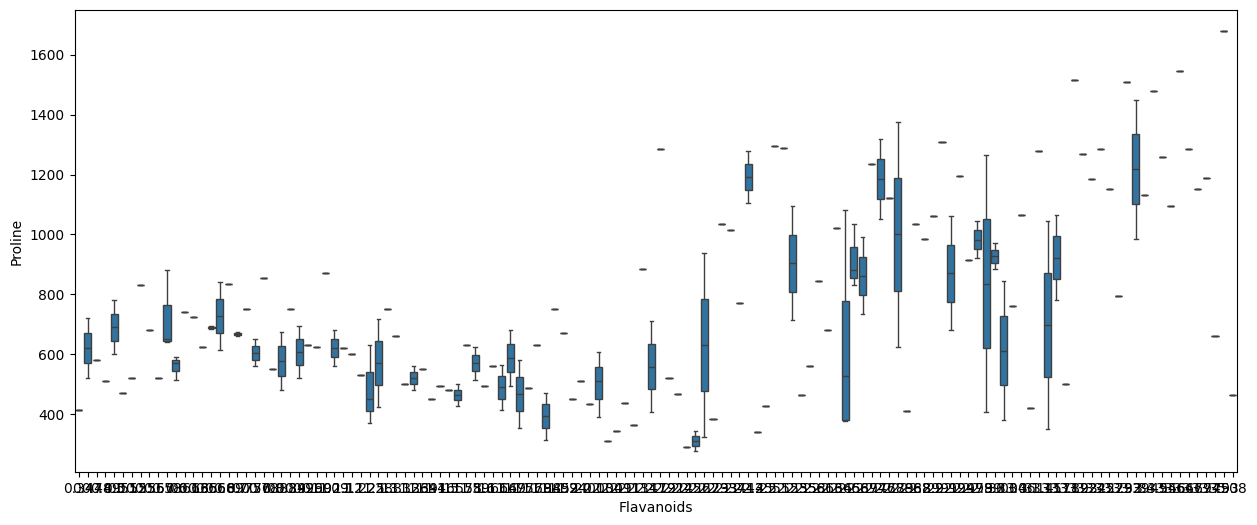

In [92]:
_, ax = plt.subplots(figsize=(15, 6))
fig.suptitle('Boxplot for Flavanoids vs Proline')
sns.boxplot(x=df['Flavanoids'], y=df['Proline'])

<Axes: ylabel='Alcohol'>

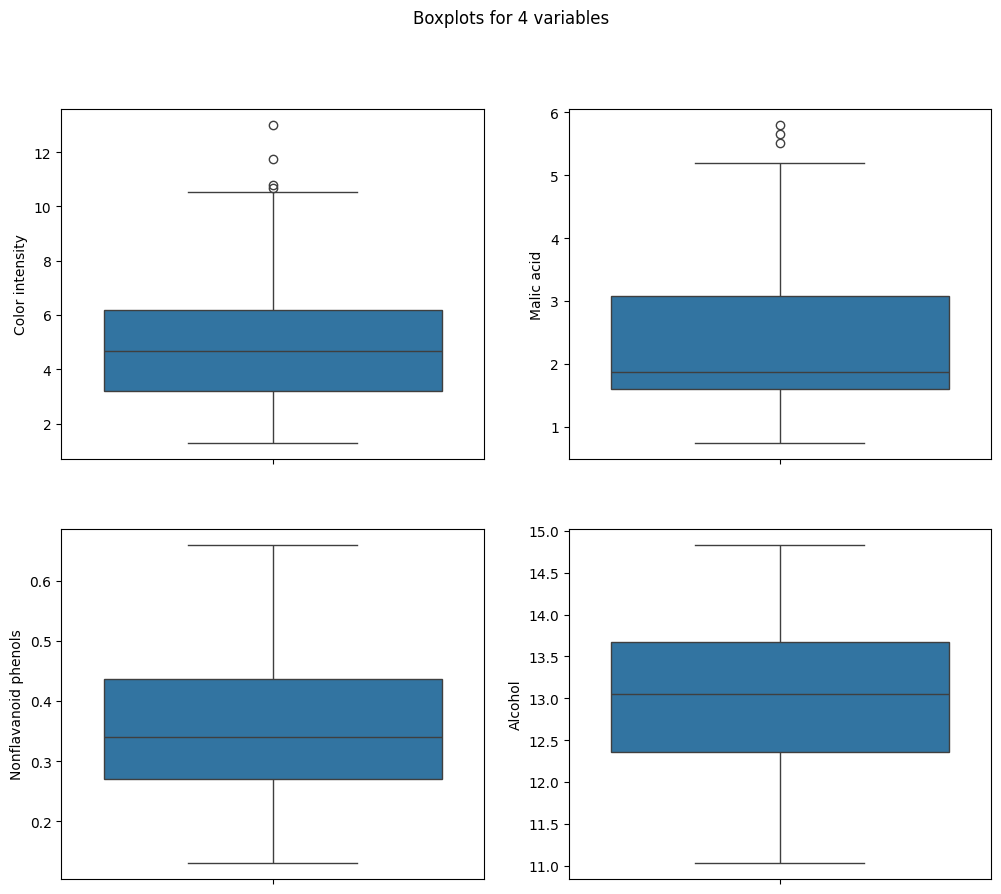

In [94]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Boxplots for 4 variables')
sns.boxplot(y=df['Color intensity'], ax=axs[0, 0])
sns.boxplot(y=df['Malic acid'], ax=axs[0, 1])
sns.boxplot(y=df['Nonflavanoid phenols'], ax=axs[1, 0])
sns.boxplot(y=df['Alcohol'], ax=axs[1, 1])

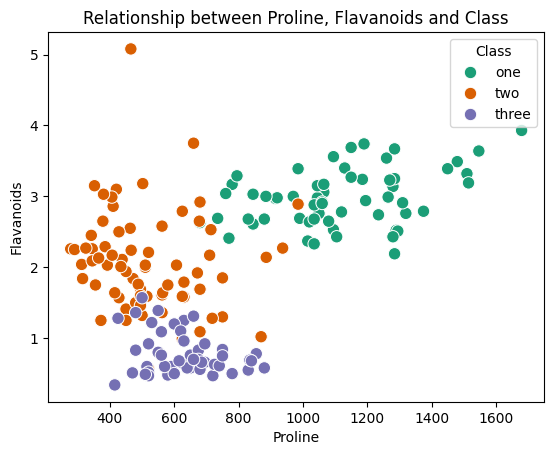

In [95]:
'''
Scatter plots
'''
sns.scatterplot(x='Proline', y='Flavanoids', hue="Class", data=df, palette="Dark2", s=80)
plt.title("Relationship between Proline, Flavanoids and Class")
plt.show()

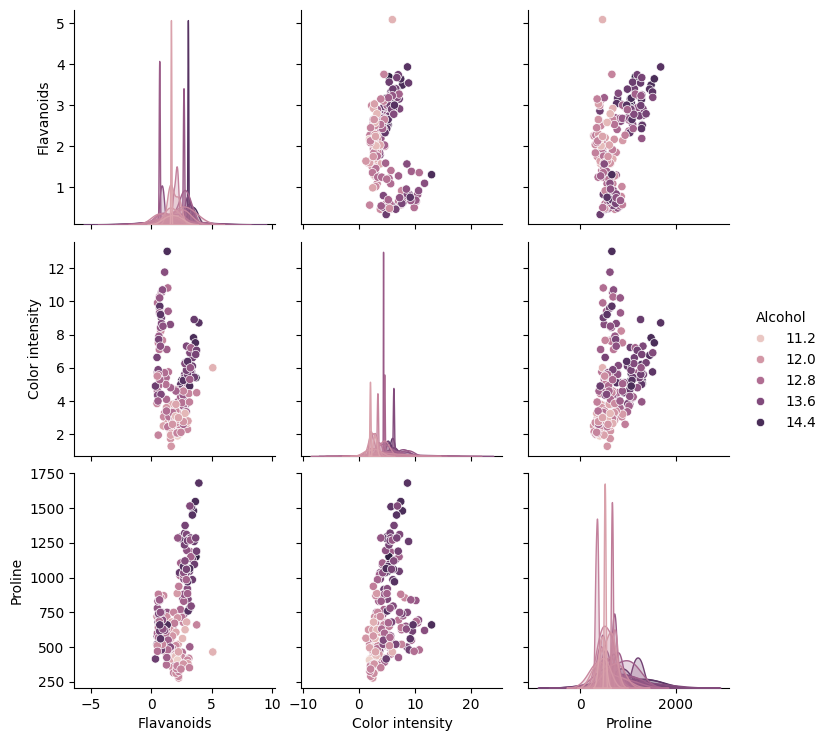

In [96]:
'''
Relations
'''
cols = ['Alcohol', 'Flavanoids', 'Color intensity', 'Proline']
_ = sns.pairplot(df[cols], hue='Alcohol', height = 2.5)

<Axes: >

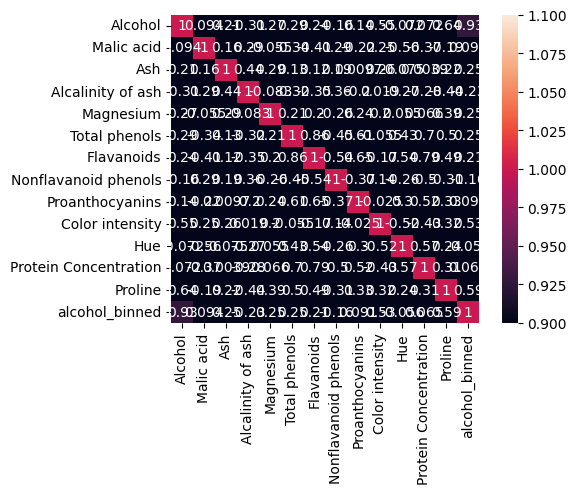

In [97]:
'''
Correlation
'''
corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(corr_matrix, vmin=1, vmax=1, square=True, annot=True)

**Critical analysis of the previous results**

* Which components characterize the different types of wine?
* Which component is the most important?